In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
## Read the dataset into Python environment

In [59]:
car_price = pd.read_csv('/content/car_age_price.csv')

In [60]:
car_price

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [61]:
## Exploratory Data Analysis

In [62]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [63]:
car_price.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [64]:
## Checking Outliers

<Axes: ylabel='Price'>

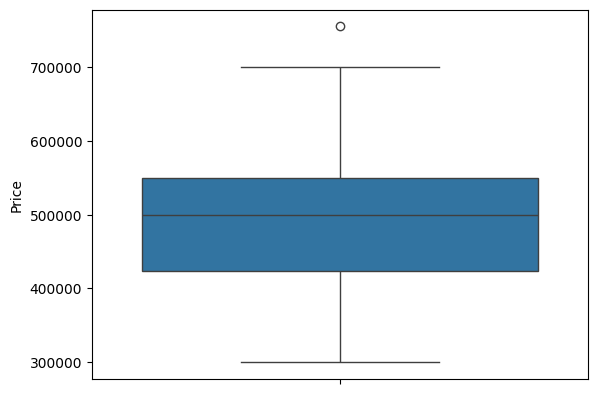

In [65]:
sns.boxplot(car_price['Price'])

<Axes: ylabel='Year'>

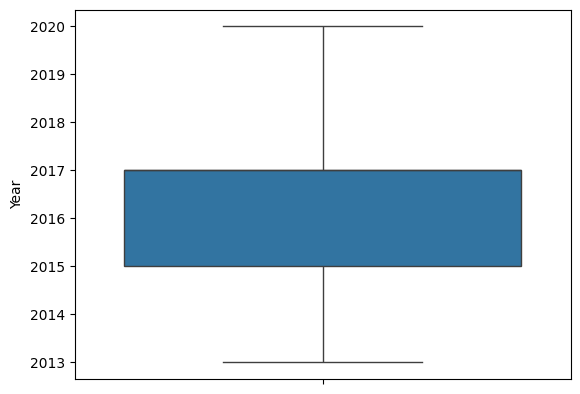

In [66]:
sns.boxplot(car_price['Year'])

In [67]:
## Treating Outliers

In [68]:
Q3=np.percentile(car_price['Price'],75,method='midpoint')
Q1=np.percentile(car_price['Price'],25,method='midpoint')


In [69]:
IQR=Q3-Q1

In [70]:
up_lim=Q3+1.5*IQR

In [71]:
outliers=[]
for x in car_price['Price']:
  if (x>up_lim):
    outliers.append(x)

In [72]:
outliers

[755000]

In [73]:
print("upper value:",up_lim)

upper value: 741250.0


In [74]:
index_out=car_price['Price']>up_lim

In [75]:
car_price.loc[index_out].index

Int64Index([1], dtype='int64')

In [76]:
car_price.drop([1],inplace=True)

In [77]:
## Scailing- MinMax scailing

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [79]:
x = ['Year','Price']
x_mm = car_price[x]

In [80]:
sd = scaler.fit_transform(x_mm)

In [81]:
sd1= pd.DataFrame(sd, columns=x)

In [100]:
print(sd1)

         Year   Price
0    0.714286  0.4125
1    0.857143  1.0000
2    0.714286  0.4125
3    0.714286  0.4125
4    0.285714  0.1250
..        ...     ...
106  0.428571  0.1875
107  0.142857  0.0000
108  0.285714  0.3125
109  0.428571  0.3000
110  0.285714  0.3125

[111 rows x 2 columns]


In [101]:
## Checking Correlation

<Axes: >

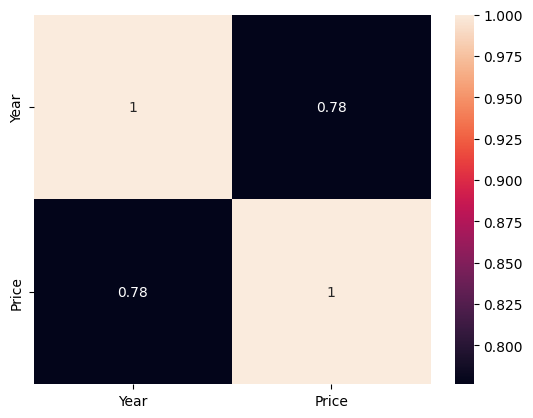

In [102]:
sns.heatmap(car_price.corr(),annot=True)

In [103]:
## train_test_split

In [104]:
y=car_price['Price']
X=car_price.drop(['Price'],axis=True)

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=25)

In [106]:
## Linear Regression

In [107]:
from sklearn import linear_model
lin_model=linear_model.LinearRegression()

In [108]:
model=lin_model.fit(X_train,y_train)

In [109]:
predict=model.predict(X_test)

In [110]:
predict

array([417801.21408898, 539831.33919491, 417801.21408898, 417801.21408898,
       499154.63082626, 417801.21408898, 499154.63082626, 580508.04756355,
       621184.7559322 , 499154.63082626, 417801.21408898, 377124.50572033,
       539831.33919491, 417801.21408898, 499154.63082626, 499154.63082626,
       499154.63082626, 336447.79735169, 458477.92245762, 580508.04756355,
       580508.04756355, 499154.63082626, 499154.63082626, 499154.63082626,
       499154.63082626])

In [111]:
from sklearn.metrics import mean_squared_error

In [112]:
print('MSE is :',mean_squared_error(y_test,predict))

MSE is : 2337431908.483115


In [113]:
from sklearn.metrics import r2_score

In [114]:
print('R2 Score is :',r2_score(y_test,predict))


R2 Score is : 0.7087189725909073


In [ ]:
## Lasso Regression

In [121]:
from sklearn import linear_model
lin_model=linear_model.Lasso

In [125]:
model=lin_model.fit(X_train,y_train)

TypeError: ElasticNet.fit() missing 1 required positional argument: 'y'